In [ ]:
#import drive from goolge colab and mount it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
books=pd.read_excel('/content/drive/MyDrive/Overview.xlsx')

In [ ]:
books.head()

,title,overview,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher
0,Data Analysis Using R: A Primer for Data Scien...,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23.0,0.55,0.39,0.06,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)"
1,Head First Data Analysis: A Beginner's Guide,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124.0,0.61,0.20,0.09,0.04,0.06,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)"
2,Guerrilla Data Analysis with Microsoft Excel,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10.0,0.87,0.13,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)"
3,Python for Data Analysis: Wrangling with Panda...,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,1686.0,0.75,0.16,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)"
4,Excel Data Analysis For Dummies,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12.0,0.52,0.17,0.10,0.10,0.10,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)"


In [ ]:
books.shape

(199, 17)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Assuming 'author' is the column containing the authors' names
# Assuming 'overview' is the column containing the book overviews
# You can adjust these column names based on your actual dataset
books['overview'] = books['overview'].fillna('')  # Fill NaN values with an empty string
books['author'] = books['author'].fillna('')  # Fill NaN values with an empty string

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(books['overview'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Build a reverse mapping of book titles to their indices
indices = pd.Series(books.index, index=books['title']).drop_duplicates()

# Function to get book recommendations for a given author
def get_author_recommendations(author_name, cosine_sim=cosine_sim):
    # Get the indices of books written by the specified author
    author_books_indices = books[books['author'].str.contains(author_name, case=False)].index

    # Initialize an empty list to store book recommendations
    recommended_books = []

    # Loop through the books written by the author
    for book_index in author_books_indices:
        # Get the cosine similarity scores for the current book
        sim_scores = list(enumerate(cosine_sim[book_index]))

        # Sort the books based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 similar books
        sim_indices = [i[0] for i in sim_scores[1:6]]

        # Append the recommended books to the list
        recommended_books.extend(list(books['title'].iloc[sim_indices]))

    return list(set(recommended_books))  # Return unique book titles

# Example usage
author_to_recommend = 'William McKinney'
author_recommendations = get_author_recommendations(author_to_recommend)

print(f'Recommended Books for Author "{author_to_recommend}":')
print(author_recommendations)


Recommended Books for Author "William McKinney":
['Automate the Boring Stuff with Python, 2nd Edition', 'Hands-On Data Analysis with Pandas', 'Data Smart: Using Data Science for Transformation', 'Data for All', 'Data Analysis with Python: Introducing Essential Elements']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score

# Assuming 'author' is the column containing the authors' names
# Assuming 'overview' is the column containing the book overviews
# You can adjust these column names based on your actual dataset
books['overview'] = books['overview'].fillna('')  # Fill NaN values with an empty string
books['author'] = books['author'].fillna('')  # Fill NaN values with an empty string

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(books['overview'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Build a reverse mapping of book titles to their indices
indices = pd.Series(books.index, index=books['title']).drop_duplicates()

# Function to get book recommendations for a given author
def get_author_recommendations(author_name, cosine_sim=cosine_sim):
    # Get the indices of books written by the specified author
    author_books_indices = books[books['author'].str.contains(author_name, case=False)].index

    # Initialize an empty list to store book recommendations
    recommended_books = []

    # Loop through the books written by the author
    for book_index in author_books_indices:
        # Get the cosine similarity scores for the current book
        sim_scores = list(enumerate(cosine_sim[book_index]))

        # Sort the books based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 similar books
        sim_indices = [i[0] for i in sim_scores[1:6]]

        # Append the recommended books to the list
        recommended_books.extend(list(books['title'].iloc[sim_indices]))

    return list(set(recommended_books))  # Return unique book titles

# Ground truth data (actual recommendations for each author)
ground_truth = {
    'William McKinney': [
        'Hands-On Data Analysis with Pandas',
        'Automate the Boring Stuff with Python, 2nd Edition',
        'Data Smart: Using Data Science for Transformation',
        'Data for All',
        'Data Analysis with Python: Introducing Essential Elements'
    ],
    # Add ground truth data for other authors as needed
}


In [ ]:
# Calculate precision and recall
precision_values = []
recall_values = []

for author, actual_recommendations in ground_truth.items():
    recommended_books = get_author_recommendations(author)

    # Calculate precision and recall for the current author
    precision = precision_score(actual_recommendations, recommended_books, average='micro')
    recall = recall_score(actual_recommendations, recommended_books, average='micro')

    # Print recommendations for the current author
    print(f'\nRecommended Books for Author "{author}":')
    for book in recommended_books:
        print(f'- {book}')

    # Print precision and recall for the current author
    print(f'\n\n\nPrecision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')

    # Append precision and recall values for further calculation
    precision_values.append(precision)
    recall_values.append(recall)

# Calculate accuracy as the average of precision and recall
accuracy = (sum(precision_values) + sum(recall_values)) / (2 * len(ground_truth))

print(f'Average Accuracy: {accuracy:.2f}')


Recommended Books for Author "William McKinney":
- Automate the Boring Stuff with Python, 2nd Edition
- Hands-On Data Analysis with Pandas
- Data Smart: Using Data Science for Transformation
- Data for All
- Data Analysis with Python: Introducing Essential Elements



Precision: 0.60
Recall: 0.60
Average Accuracy: 0.60





Precision: 0.60
Recall: 0.60
Average Accuracy: 0.60


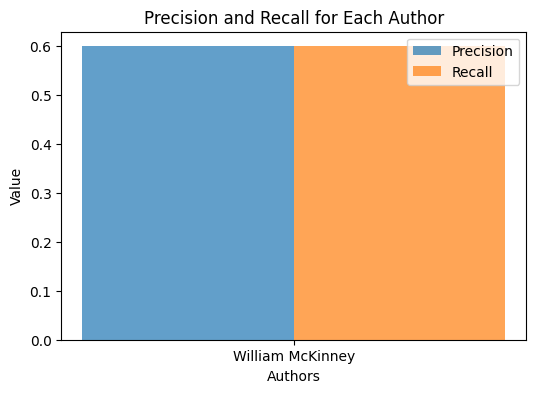

In [ ]:
print(f'\n\n\nPrecision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Average Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

# Bar chart for precision and recall
authors = list(ground_truth.keys())
precision_recall_values = list(zip(precision_values, recall_values))

plt.figure(figsize=(6, 4))
bar_width = 0.35
bar_positions = range(len(authors))

plt.bar(bar_positions, [val[0] for val in precision_recall_values], bar_width, label='Precision', alpha=0.7)
plt.bar([pos + bar_width for pos in bar_positions], [val[1] for val in precision_recall_values], bar_width, label='Recall', alpha=0.7)

plt.xlabel('Authors')
plt.ylabel('Value')
plt.title('Precision and Recall for Each Author')
plt.xticks([pos + bar_width / 2 for pos in bar_positions], authors)
plt.legend()

plt.show()